<a href="https://colab.research.google.com/github/geethaprakash2020/Basic-python-programming/blob/master/Mnist_Functional_API_pranali's_class_jan_31st_%2CFeb_6th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Case Study

The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

In [ ]:
%tensorflow_version 2.x
from tensorflow import keras

In [ ]:
import tensorflow as tf

<p><h3><b><font color = 'DarkBlue'> Loading the MNIST dataset in Keras </font></b></h3></p>

The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy
arrays.

In [ ]:
from keras.datasets import mnist
train_images.shape

(60000, 784)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
test_images.shape

(10000, 784)

In [ ]:
test_labels.shape

(10000, 10)

In [ ]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()  # similar xtrain, ytrain

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255


In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
from keras.layers import Input
from keras.layers import Dense

In [ ]:
inp = keras.layers.Input(shape=(784,))
hidden1 = keras.layers.Dense(30, activation='relu')(inp)
hidden2 = keras.layers.Dense(20, activation='relu')(hidden1)
out = keras.layers.Dense(10, activation='softmax')(hidden2)
model_fapi = keras.models.Model(inputs=inp, outputs=out)

In [ ]:
model_fapi.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_fapi.compile(optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
model_fapi.fit(train_images, train_labels, epochs=10, batch_size=512)

Epoch 1/10
118/118 [==============================] - 1s 5ms/step - loss: 2.2166 - accuracy: 0.2270
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 1.8594 - accuracy: 0.5074
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 1.4444 - accuracy: 0.6383
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 1.1145 - accuracy: 0.7243
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.8894 - accuracy: 0.7818
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.7407 - accuracy: 0.8140
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.6485 - accuracy: 0.8313
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.5799 - accuracy: 0.8484
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.5291 - accuracy: 0.8595
Epoch 10/10
118/118 [==============================] - 1s 6ms/step - loss: 0.4952 - accuracy: 0.8671

In [ ]:
y_pred_fapi = model_fapi.predict(test_images)    # predict() estimates one probablity per class from 0 to 9 
y_pred_fapi

array([[1.59082629e-04, 9.93646448e-04, 9.38768731e-04, ...,
        9.78264332e-01, 8.60578264e-04, 1.35410950e-02],
       [3.03227484e-01, 3.53738578e-04, 4.86937344e-01, ...,
        9.13946569e-05, 2.49445196e-02, 7.55512097e-04],
       [5.01331117e-04, 8.96130919e-01, 2.11619232e-02, ...,
        2.48763859e-02, 1.79535132e-02, 6.87738042e-03],
       ...,
       [1.01046953e-05, 1.80356641e-04, 4.56281658e-03, ...,
        8.05079751e-03, 1.58216096e-02, 1.20846994e-01],
       [1.91781037e-02, 1.40202255e-03, 4.60386230e-03, ...,
        2.30046418e-02, 2.45432228e-01, 9.56142414e-03],
       [2.52629444e-03, 3.77035203e-09, 3.36684898e-04, ...,
        6.89708202e-08, 9.95813571e-06, 8.01205147e-07]], dtype=float32)

In [ ]:
test_loss_fapi,test_acc_fapi=model_fapi.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.4495 - accuracy: 0.8755


In [ ]:
print(test_loss_fapi)
print(test_acc_fapi)

0.44953614473342896
0.8755000233650208


In [ ]:
import numpy as np

In [ ]:
#np.where((y_pred_fapi == max(y_pred_fapi[:,:])),1,0)
y_pred_class = []
len(y_pred_fapi)
for i in np.arange(len(y_pred_fapi)):
  for j in np.arange(0,10):
    if(y_pred_fapi[i,j] == max(y_pred_fapi[i,:])):
      y_pred_class.append(j)

y_pred_class = np.array(y_pred_class)
y_pred_class

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
test_loss_fapi, test_acc_fapi = model_fapi.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.8755


In [ ]:
print(test_loss_fapi)
print(test_acc_fapi)

0.44953614473342896
0.8755000233650208


<p><h3><b><font color='DarkBlue'> Building Complex Model using Functional API </font></b></h3></p>

We can build a complex model using functional API by following steps: 

1. We are creating a model with a input layer that accepts the input of 784. 

2. Next, we added a dense layer with 30 neurons with 'relu' activation function and connect it to input layer. 

3. similarly, another dense layer with 30 neurons with 'relu' activation function is added which is connected to the first hidden layer (hidden1).

4. Next, we create a Concatenate() layer, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer. 

5. Lastly, we have added an output dense layer with 10 neurons and a 'softmax' activation function. The input to this layer is the result of the concatenation layer. 

6. Finally, we create a model with the above created layers required for computation. 

Once you have built the Keras model, everything is exactly like earlier, i.e: compile the model, train it, evaluate it and use it to make predictions.

<img src = "https://dim-mlp-images.s3.amazonaws.com/Deep+Learning/MINST/wide+and+deep+network.png" width =600 height =600> 

In [ ]:
inp1 = keras.layers.Input(shape=(784))
hidden1 = keras.layers.Dense(30, activation="relu")(inp1)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([inp1, hidden2])
out = keras.layers.Dense(10, activation="softmax" )(concat)
model_wide_deep = keras.models.Model(inputs=[inp1], outputs=[out])

In [ ]:
model_wide_deep.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           23550       input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 814)          0           input_2[0][0]                    
                                                                 dense_4[0][0]              

In [ ]:
model_wide_deep.compile(optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
model_wide_deep.fit(train_images, train_labels, epochs=10, batch_size=512)

Epoch 1/10
118/118 [==============================] - 1s 9ms/step - loss: 2.0600 - accuracy: 0.3002
Epoch 2/10
118/118 [==============================] - 1s 9ms/step - loss: 1.3705 - accuracy: 0.7292
Epoch 3/10
118/118 [==============================] - 1s 9ms/step - loss: 1.0625 - accuracy: 0.7965
Epoch 4/10
118/118 [==============================] - 1s 9ms/step - loss: 0.8904 - accuracy: 0.8219
Epoch 5/10
118/118 [==============================] - 1s 9ms/step - loss: 0.7913 - accuracy: 0.8366
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.7259 - accuracy: 0.8448
Epoch 7/10
118/118 [==============================] - 1s 9ms/step - loss: 0.6778 - accuracy: 0.8484
Epoch 8/10
118/118 [==============================] - 1s 9ms/step - loss: 0.6374 - accuracy: 0.8545
Epoch 9/10
118/118 [==============================] - 1s 9ms/step - loss: 0.6008 - accuracy: 0.8616
Epoch 10/10
118/118 [==============================] - 1s 8ms/step - loss: 0.5829 - accuracy: 0.8629

In [ ]:
y_pred_wide = model_wide_deep.predict(test_images)

In [ ]:
y_pred_wide

array([[3.3768064e-03, 2.5849006e-04, 1.8203732e-03, ..., 9.4685423e-01,
        4.0353942e-03, 2.9829031e-02],
       [5.6845412e-02, 1.1653397e-02, 4.7812656e-01, ..., 1.0555715e-03,
        4.3162048e-02, 1.7486599e-03],
       [4.8161591e-03, 8.3382791e-01, 3.5679597e-02, ..., 1.2886577e-02,
        3.2653153e-02, 1.2441701e-02],
       ...,
       [6.5504911e-04, 2.0471399e-03, 4.1883597e-03, ..., 4.7358766e-02,
        6.9897465e-02, 2.1059422e-01],
       [4.5208272e-02, 8.9475274e-02, 3.4973253e-02, ..., 4.7868125e-02,
        2.3747274e-01, 2.2899058e-02],
       [8.7170787e-03, 1.5722946e-05, 1.3985924e-02, ..., 9.1124690e-05,
        4.2021222e-04, 3.1383726e-04]], dtype=float32)

In [ ]:
y_pred_class = y_pred_wide.argmax(axis=1)
y_pred_class

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
test_loss, test_acc = model_wide_deep.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.5421 - accuracy: 0.8755


In [ ]:
test_loss

0.5420863032341003

In [ ]:
test_acc

0.8755000233650208

<p><h3><b><font color = 'DarkBlue'> Complex Model with multiple inputs </font></b></h3></p>

We can also create a model by sending a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path. 

<img src = "https://dim-mlp-images.s3.amazonaws.com/Deep+Learning/MINST/wide+and+deep+network+multi+input.png" width=600 height=600>

Here we used first 500 columns as input_A and all the columns (784) as input_B. 

Rest of the model building procedure is same except now we specify inputs=[input_A, input_B] and outputs = [output] 

Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix (train_images), we must pass a
pair of matrices (X_train_A, X_train_B): one per input. The same is true for
X_test when you call evaluate() or predict(). 

In [ ]:
input_A = keras.layers.Input(shape=(500,))   #here we are splitting the features(columns) and all rows are used and this is used in resnet
input_B = keras.layers.Input(shape=(784,))
hidden1 = keras.layers.Dense(100, activation="relu")(input_B)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(10, activation='softmax')(concat)
model_wide_deep1 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model_wide_deep1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 100)          78500       input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 100)          10100       dense_6[0][0]                    
____________________________________________________________________________________________

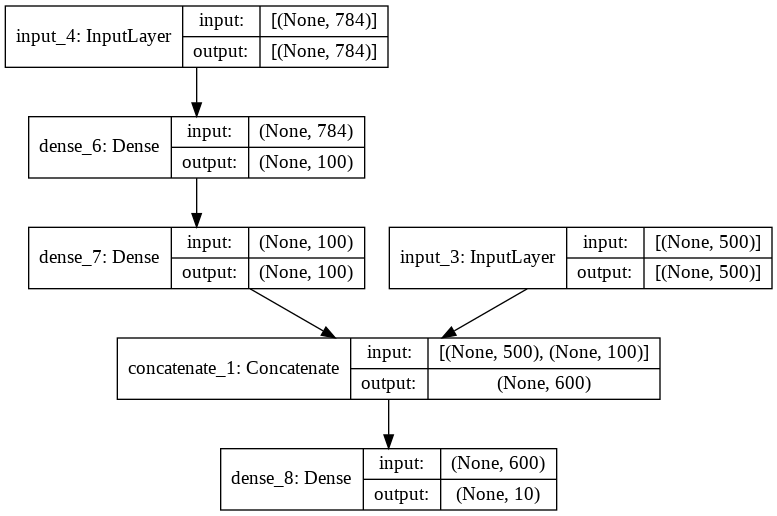

In [ ]:
from keras.utils.vis_utils import plot_model  #pictorial representation of summary
plot_model(model_wide_deep1, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)


In [ ]:
model_wide_deep1.compile(optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
X_train_A, X_train_B = train_images[:,:500], train_images[:,:]
X_train_A.shape, X_train_B.shape

((60000, 500), (60000, 784))

In [ ]:
X_test_A, X_test_B = test_images[:,:500], test_images[:,:]
X_test_A.shape, X_test_B.shape

((10000, 500), (10000, 784))

In [ ]:
model_wide_deep1.fit((X_train_A, X_train_B), train_labels, epochs=10, batch_size=512)
# 118 batches with 512 images passed each 

Epoch 1/10
118/118 [==============================] - 2s 11ms/step - loss: 2.0519 - accuracy: 0.3064
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 1.4352 - accuracy: 0.7054
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 1.1166 - accuracy: 0.7758
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.9152 - accuracy: 0.8094
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.7893 - accuracy: 0.8300
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.6978 - accuracy: 0.8410
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.6380 - accuracy: 0.8503
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 0.5901 - accuracy: 0.8576
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 0.5564 - accuracy: 0.8612
Epoch 10/10
118/118 [==============================] - 1s 11ms/step - loss: 0.5251 - accura

In [ ]:
y_pred_wide1 = model_wide_deep1.predict((X_test_A, X_test_B)) #argmax used to get labels from predictions
y_pred_class1 = y_pred_wide1.argmax(axis=1)
y_pred_class1

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_pred_fapi.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
test_loss_fapi,test_acc_fapi=model_fapi.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.8755


In [ ]:
print(test_loss_fapi)
print(test_acc_fapi)

0.44953614473342896
0.8755000233650208


<p><h3><b><font color = 'DarkBlue'> Complex Model with multiple outputs </font></b></h3></p>

There are also many use cases in which you may want to have multiple outputs:

• The task may demand it, for example you may want to locate and classify the
main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.

• Similarly, you may have multiple independent tasks to perform based on the
same data. Sure, you could train one neural network per task, but in many cases
you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks.

• Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see following figure ) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

<img src = "https://dim-mlp-images.s3.amazonaws.com/Deep+Learning/MINST/wide+and+deep+network+multi+output.png" width=600 height=600>

Adding extra outputs is quite easy: just connect them to the appropriate layers and add them to your model’s list of outputs.

In [ ]:
# Building the model

input_A = keras.layers.Input(shape=(500,))
input_B = keras.layers.Input(shape=(784,))
hidden1 = keras.layers.Dense(100, activation="relu")(input_B)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(10, activation='softmax')(concat)
aux_output = keras.layers.Dense(10, activation='softmax')(hidden2)
model_wide_deep2 = keras.models.Model(inputs=[input_A, input_B],
outputs=[output, aux_output])

In [ ]:
model_wide_deep2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 100)          78500       input_6[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 100)          10100       dense_9[0][0]                    
____________________________________________________________________________________________

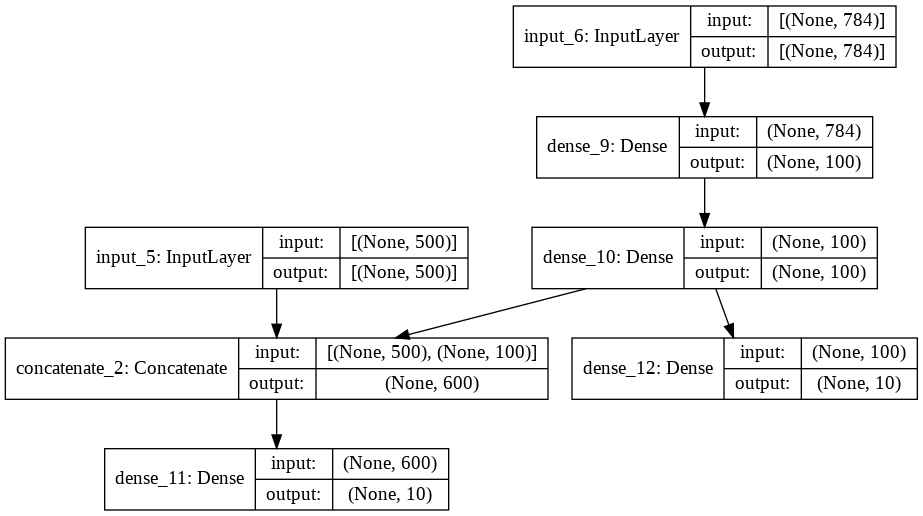

In [ ]:
from keras.utils.vis_utils import plot_model  #pictorial representation of summary
plot_model(model_wide_deep2, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)
#summary in pictorial representation

Each output will need its own loss function, so when we compile the model we
should pass a list of losses. However, we care much more about the main output than about the auxiliary output (as it is just used for regularization), so we want to give the main output’s loss a much greater weight. So in compile step we can set the loss weights.

In [ ]:
model_wide_deep2.compile(loss=["categorical_crossentropy", "categorical_crossentropy"], loss_weights=[0.9, 0.1], optimizer="sgd")
#here we are giving more weights to output(0.9) and less weight to auxillary output

In [ ]:
model_wide_deep2.fit((X_train_A, X_train_B), (train_labels,train_labels) , epochs=20, batch_size=512) 

Epoch 1/20
118/118 [==============================] - 2s 12ms/step - loss: 1.8881 - dense_11_loss: 1.8446 - dense_12_loss: 2.2790
Epoch 2/20
118/118 [==============================] - 1s 12ms/step - loss: 1.4461 - dense_11_loss: 1.3636 - dense_12_loss: 2.1885
Epoch 3/20
118/118 [==============================] - 1s 12ms/step - loss: 1.1845 - dense_11_loss: 1.0856 - dense_12_loss: 2.0750
Epoch 4/20
118/118 [==============================] - 1s 12ms/step - loss: 1.0071 - dense_11_loss: 0.9041 - dense_12_loss: 1.9347
Epoch 5/20
118/118 [==============================] - 1s 12ms/step - loss: 0.8861 - dense_11_loss: 0.7858 - dense_12_loss: 1.7882
Epoch 6/20
118/118 [==============================] - 1s 11ms/step - loss: 0.7930 - dense_11_loss: 0.6992 - dense_12_loss: 1.6371
Epoch 7/20
118/118 [==============================] - 1s 11ms/step - loss: 0.7215 - dense_11_loss: 0.6359 - dense_12_loss: 1.4925
Epoch 8/20
118/118 [==============================] - 1s 11ms/step - loss: 0.6749 - dense_

In [ ]:
model_wide_deep2.fit((X_train_A, X_train_B), (train_labels,train_labels) , epochs=20, batch_size=512) 
metrics=['accuracy']

Epoch 1/20
118/118 [==============================] - 1s 12ms/step - loss: 0.3962 - dense_11_loss: 0.3704 - dense_12_loss: 0.6279
Epoch 2/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3882 - dense_11_loss: 0.3640 - dense_12_loss: 0.6065
Epoch 3/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3809 - dense_11_loss: 0.3580 - dense_12_loss: 0.5871
Epoch 4/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3741 - dense_11_loss: 0.3525 - dense_12_loss: 0.5692
Epoch 5/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3679 - dense_11_loss: 0.3473 - dense_12_loss: 0.5530
Epoch 6/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3620 - dense_11_loss: 0.3424 - dense_12_loss: 0.5380
Epoch 7/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3564 - dense_11_loss: 0.3377 - dense_12_loss: 0.5243
Epoch 8/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3513 - dense_

When we evaluate the model, Keras will return the total loss, as well as all the individual losses.

In [ ]:
total_loss, main_loss, aux_loss = model_wide_deep2.evaluate((X_test_A, X_test_B), (test_labels,test_labels))
total_loss, main_loss, aux_loss

313/313 [==============================] - 1s 2ms/step - loss: 0.0830 - dense_11_loss: 0.0822 - dense_12_loss: 0.0901


(0.08296915888786316, 0.0821760967373848, 0.09010718017816544)

The predict() method will return predictions for each output. 

In [ ]:
y_pred_main, y_pred_aux= model_wide_deep2.predict((X_test_A, X_test_B))
y_pred_class2 = y_pred_main.argmax(axis=1)
y_pred_class2

array([8, 8, 1, ..., 4, 8, 6])